In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [ ]:
import string;
from tqdm import tqdm

In [ ]:
df = pd.read_csv('detection (1).txt', header = None)
df.columns = ['data']

In [ ]:
df[:11]

data
0   0|im_in_0.png|[ [0.98582095 0.3349454  0.30242...
1    0.         0.         0.         0.         0...
2    0.         0.         0.         0.         0...
3    0.         0.         0.         0.         0...
4    0.         0.         0.         0.         0...
5    0.         0.         0.         0.         0...
6    0.         0.         0.         0.         0...
7    0.         0.         0.         0.         0...
8    0.         0.        ]|[ [ 0. 77. 59.  0.  0....
9     0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...
10    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  ...

In [ ]:
df['data'][10]

'  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]|[person bicycle car]'

## Pre-Processing data to save time from tweaking OS layer code and instead reformatting the data we already have in detections.csv

In [ ]:
def l_concatenator(datF):
  
  for i in range(0, len(datF) - 12, 11):
    print ('first row: ', datF['data'][i]);
    print ('11th row: ', datF['data'][i + 11]);


In [ ]:
temp = ''
for i in range(len(df)):
  temp += str(df['data'][i]);
temp


'0|im_in_0.png|[ [0.98582095 0.3349454  0.30242687 0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.        ]|[ [ 0. 77. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]|[person bicycle car]1|im_in_1.png|[ [0.8281204 0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.

In [ ]:
print(temp.split('|'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
temp.split('|')[0]

NameError: ignored

In [ ]:
len(temp.split('|')[1:])
temp_split = temp.split('|')[1:]

In [ ]:
temp_split

['im_in_0.png',
 '[ [0.98582095 0.3349454  0.30242687 0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.        ]',
 '[ [ 0. 77. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]',
 '[person bicycle car]1',
 'im_in_1.png',
 '[ [0.8281204 0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.    

In [ ]:
for i in range(0, len(temp_split), 3):
  print (temp_split[i])
  if (i > 4):
    break;

im_in_0.png
[person bicycle car]1
[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
temp_no_new = temp.replace('\n', '')

In [ ]:
temp_nonu_split = temp_no_new.split('|')[1:]
temp_nonu_split

['im_in_0.png',
 '[ [0.98582095 0.3349454  0.30242687 0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.        ]',
 '[ [ 0. 77. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]',
 '[person bicycle car]1',
 'im_in_1.png',
 '[ [0.8281204 0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.    

In [ ]:
f_names_list = [];
scores_list = [];
class_list = [];
class_label_list = [];
for i in range(0, len(temp_nonu_split), 4):
  f_names_list.append(temp_nonu_split[i]);

for i in range(1, len(temp_nonu_split), 4):
  scores_list.append(temp_nonu_split[i]);

for i in range(2, len(temp_nonu_split), 4):
  class_list.append(temp_nonu_split[i]);

for i in range(3, len(temp_nonu_split), 4):
  class_label_list.append(temp_nonu_split[i]);


In [ ]:
f_names_list

['im_in_0.png',
 'im_in_1.png',
 'im_in_10.png',
 'im_in_100.png',
 'im_in_1000.png',
 'im_in_1001.png',
 'im_in_1002.png',
 'im_in_1003.png',
 'im_in_1004.png',
 'im_in_1005.png',
 'im_in_1006.png',
 'im_in_1007.png',
 'im_in_1008.png',
 'im_in_1009.png',
 'im_in_101.png',
 'im_in_1010.png',
 'im_in_1011.png',
 'im_in_1012.png',
 'im_in_1013.png',
 'im_in_1014.png',
 'im_in_1015.png',
 'im_in_1016.png',
 'im_in_1017.png',
 'im_in_1018.png',
 'im_in_1019.png',
 'im_in_102.png',
 'im_in_1020.png',
 'im_in_1021.png',
 'im_in_1022.png',
 'im_in_1023.png',
 'im_in_1024.png',
 'im_in_1025.png',
 'im_in_1026.png',
 'im_in_1027.png',
 'im_in_1028.png',
 'im_in_1029.png',
 'im_in_103.png',
 'im_in_1030.png',
 'im_in_1031.png',
 'im_in_1032.png',
 'im_in_1033.png',
 'im_in_1034.png',
 'im_in_1035.png',
 'im_in_1036.png',
 'im_in_1037.png',
 'im_in_1038.png',
 'im_in_1039.png',
 'im_in_104.png',
 'im_in_1040.png',
 'im_in_1041.png',
 'im_in_1042.png',
 'im_in_1043.png',
 'im_in_1044.png',
 'im_i

In [ ]:
scores_list

['[ [0.98582095 0.3349454  0.30242687 0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.         0.         0.         0.         0. 0.         0.        ]',
 '[ [0.8281204 0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.        0.        0.        0.        0.        0.        0. 0.       ]',
 '[ [0.6871961  0.44457653 0.         0.       

In [ ]:
class_list

['[ [ 0. 77. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]',
 '[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[ [ 0. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]',
 '[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
class_label_list

['[person bicycle car]1',
 '[person]2',
 '[person bicycle]3',
 '[]4',
 '[]5',
 '[]6',
 '[]7',
 '[person]8',
 '[]9',
 '[]10',
 '[]11',
 '[person bicycle car motorbike aeroplane bus train truck boat traffic light fire hydrant]12',
 '[person bicycle]13',
 '[person bicycle]14',
 '[person]15',
 '[person bicycle]16',
 '[]17',
 '[person]18',
 '[]19',
 '[person]20',
 '[person bicycle]21',
 '[]22',
 '[person bicycle]23',
 '[]24',
 '[person]25',
 '[person]26',
 '[]27',
 '[]28',
 '[person bicycle car]29',
 '[person]30',
 '[]31',
 '[]32',
 '[person]33',
 '[]34',
 '[person]35',
 '[]36',
 '[person bicycle]37',
 '[person]38',
 '[]39',
 '[person]40',
 '[person]41',
 '[person]42',
 '[person]43',
 '[person]44',
 '[person]45',
 '[person bicycle]46',
 '[person bicycle]47',
 '[person]48',
 '[]49',
 '[person]50',
 '[person]51',
 '[person]52',
 '[person bicycle]53',
 '[]54',
 '[]55',
 '[]56',
 '[]57',
 '[person]58',
 '[person]59',
 '[]60',
 '[]61',
 '[person]62',
 '[person]63',
 '[]64',
 '[person]65',
 '[per

In [ ]:
yolo_results = pd.DataFrame(f_names_list[:5000]);
yolo_results.columns = ['filenames'];
yolo_results

filenames
0        im_in_0.png
1        im_in_1.png
2       im_in_10.png
3      im_in_100.png
4     im_in_1000.png
...              ...
4995   im_in_995.png
4996   im_in_996.png
4997   im_in_997.png
4998   im_in_998.png
4999   im_in_999.png

[5000 rows x 1 columns]

In [ ]:
## Since files contain duplicate values; the dataset contains 2 identical values/rows for each image
yolo_results['scores'] = scores_list[:5000];
yolo_results['classes'] = class_list[:5000];
yolo_results['class label'] = class_label_list[:5000];
yolo_results

filenames                                             scores  \
0        im_in_0.png  [ [0.98582095 0.3349454  0.30242687 0.        ...   
1        im_in_1.png  [ [0.8281204 0.        0.        0.        0. ...   
2       im_in_10.png  [ [0.6871961  0.44457653 0.         0.        ...   
3      im_in_100.png  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...   
4     im_in_1000.png  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...   
...              ...                                                ...   
4995   im_in_995.png  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...   
4996   im_in_996.png  [ [0.65885437 0.         0.         0.        ...   
4997   im_in_997.png  [ [0.7106069 0.2977581 0.        0.        0. ...   
4998   im_in_998.png  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...   
4999   im_in_999.png  [ [0.61293465 0.44639426 0.2543036  0.        ...   

                                                classes            class label  
0     [ [ 0. 77. 59.  0.  0.  0.  0.  0.  0.  0.  0....  [person bicycle car]1  
1     [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...              [person]2  
2     [ [ 0. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0....      [person bicycle]3  
3     [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...                    []4  
4     [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...                    []5  
...                                                 ...                    ...  
4995  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...                 []4996  
4996  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...           [person]4997  
4997  [ [ 0. 62.  0.  0.  0.  0.  0.  0.  0.  0.  0....   [person bicycle]4998  
4998  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...                 []4999  
4999  [ [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...  [person bicycle car]0  

[5000 rows x 4 columns]

In [ ]:
yolo_results['class label'] = yolo_results['class label'].apply(lambda x : x.rstrip(string.digits));

In [ ]:
from google.colab import files;
yolo_results.to_csv('YOLO_results.csv');
files.download('YOLO_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Extracting and processing the label feature and dumping that in a csv with corresponding image values for Harshika

In [ ]:
df = pd.read_csv('YOLO_results.csv')
df = df.drop(columns = ['Unnamed: 0','scores', 'classes']);
df

filenames           class label
0        im_in_0.png  [person bicycle car]
1        im_in_1.png              [person]
2       im_in_10.png      [person bicycle]
3      im_in_100.png                    []
4     im_in_1000.png                    []
...              ...                   ...
4995   im_in_995.png                    []
4996   im_in_996.png              [person]
4997   im_in_997.png      [person bicycle]
4998   im_in_998.png                    []
4999   im_in_999.png  [person bicycle car]

[5000 rows x 2 columns]

In [ ]:
type(df['class label'][0])

str

In [ ]:
df['class label'][0]

'[person bicycle car]'

In [ ]:
df['class label'] = df['class label'].apply(lambda x: x[1:-1].split(' '));
df

filenames             class label
0        im_in_0.png  [person, bicycle, car]
1        im_in_1.png                [person]
2       im_in_10.png       [person, bicycle]
3      im_in_100.png                      []
4     im_in_1000.png                      []
...              ...                     ...
4995   im_in_995.png                      []
4996   im_in_996.png                [person]
4997   im_in_997.png       [person, bicycle]
4998   im_in_998.png                      []
4999   im_in_999.png  [person, bicycle, car]

[5000 rows x 2 columns]

In [ ]:
type(df['class label'][0])

list

In [ ]:
from google.colab import files;
df.to_csv('YOLO_results_labels_only.csv');
files.download('YOLO_results_labels_only.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('YOLO_results_labels_only.csv');
df = df.drop('Unnamed: 0', axis = 1)
df

filenames                   class label
0        im_in_0.png  ['person', 'bicycle', 'car']
1        im_in_1.png                    ['person']
2       im_in_10.png         ['person', 'bicycle']
3      im_in_100.png                          ['']
4     im_in_1000.png                          ['']
...              ...                           ...
4995   im_in_995.png                          ['']
4996   im_in_996.png                    ['person']
4997   im_in_997.png         ['person', 'bicycle']
4998   im_in_998.png                          ['']
4999   im_in_999.png  ['person', 'bicycle', 'car']

[5000 rows x 2 columns]

In [ ]:
objsDet = df['class label'].apply(lambda x : len(x) - 1)
objsDet.sum()

4195

<Axes: >

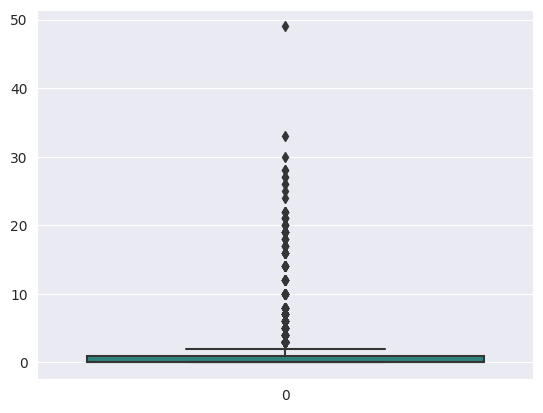

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(objsDet, palette = 'viridis')

In [ ]:
objsDet.min()

0

In [ ]:
objsDet.describe()

count    5000.000000
mean        0.839000
std         2.658664
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        49.000000
Name: class label, dtype: float64

In [ ]:
df['objsDet'] = objsDet

In [ ]:
type(df['class label'][0])

list

In [ ]:
df['objsDet'] = df['objsDet'].apply(lambda x: x - 1)

In [ ]:
df[df['objsDet'] == df['objsDet'].max()]['class label'].apply(lambda x: print (x))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic', 'light', 'fire', 'hydrant', 'stop', 'sign', 'parking', 'meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports', 'ball', 'kite', 'baseball', 'bat', 'baseball', 'glove', 'skateboard', 'surfboard', 'tennis', 'racket', 'bottle', 'wine', 'glass']


3907    None
Name: class label, dtype: object

In [ ]:
len(df['filenames'].unique())

5000